In [6]:
import pickle, matplotlib.pyplot as plt, numpy as np, os
from src.TorchDSP.dataloader import get_Qsq, getQsq_fromdir, mean_peak
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['g',  'b', 'k', 'y', 'm', 'c'])  # type: ignore

discard = 10000
i,j = 2, 0

Q1,Rs,Nch,P = get_Qsq('./outputs/Qfactor/Q2000/baselines.pkl', discard=discard)
cdc = Q1['CDC'][i, j,:]
Q, Rs, Nch, P = getQsq_fromdir('./outputs/Qfactor_1205/Q2000/few_test/', discard=discard)

sqz = lambda x: np.squeeze(x) if (x.shape[0]!=4) else x[i,j]

# show results for config

In [7]:
import os, yaml, torch, matplotlib.pyplot as plt
# with open("configs/pbc/base.yaml", 'r') as file:
#     args = yaml.safe_load(file)
ckpt1 = torch.load('_models/Rs80/SymFoPBC/SymFoPBC_L400_rho1_index_typeA_Nch1_Rs80_train1.ckpt50', map_location='cpu')
ckpt2 = torch.load('_models/Rs80/SymHoPBC/SymHoPBC_L400_rho1_steps2_Nch1_Rs80_train1.ckpt100', map_location='cpu')

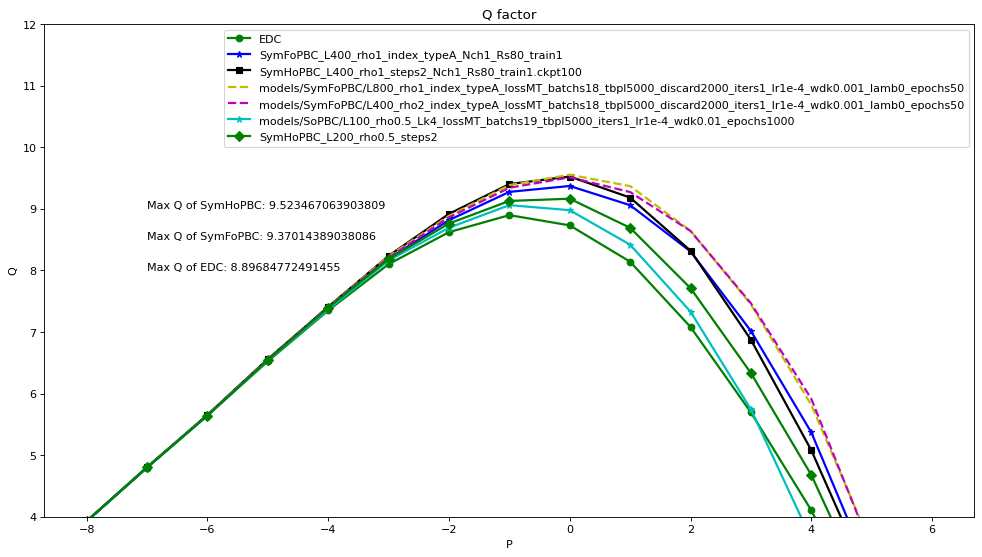

In [8]:
plt.figure(figsize=(15,8), dpi=80)
plt.plot(P, cdc, '-o', linewidth=2, label='EDC')
plt.plot(P, ckpt1['metric']['Qsq'], '-*', linewidth=2,  label=ckpt1['model_path'][8:])
plt.plot(P, ckpt2['metric']['Qsq'], '-s', linewidth=2, label=ckpt2['model_path'][8:])

# rho=1, wdk=0.001, epochs=2000, lossMT, index_typeA
for key in  Q.keys():
    if 'SymFoPBC/L100' in key and 'rho0.5' in key and 'epochs50' in key and 'lossMT' in key and 'index_typeA' in key:
        plt.plot(P, sqz(Q[key]), '--', linewidth=2, label=key)


for key in  Q.keys():
    if 'SymFoPBC/L800' in key and 'rho1' in key and 'epochs50' in key and 'lossMT' in key and 'index_typeA' in key:
        plt.plot(P, sqz(Q[key]), '--', linewidth=2, label=key)

for key in  Q.keys():
    if 'SymFoPBC/L400' in key and 'rho2' in key and 'epochs50' in key and 'lossMT' in key and 'index_typeA' in key:
        plt.plot(P, sqz(Q[key]), '--', linewidth=2, label=key)

for key in  Q.keys():
    if 'SoPBC' in key and 'epochs1000' in key and 'Lk4' in key:
        plt.plot(P, np.squeeze(Q[key]), '-*', linewidth=2, label=key)



# rho=1, wdk=0.001, epochs=2000, lossMT, index_typeA
ckpt = torch.load('models/SymHoPBC/L200_rho0.5_steps2_lossMT_batchs18_tbpl5000_discard2000_iters1_lr2e-4_wdk0.001_lamb0_epochs400/Nch1_Rs80.pth.ckpt400', map_location='cpu')
plt.plot(P, ckpt['metric']['Qsq'], '-D', linewidth=2, label='SymHoPBC_L200_rho0.5_steps2')



plt.text(-7, 9, f"Max Q of {ckpt2['model_name']}: {np.max(ckpt2['metric']['Qsq'])}")
plt.text(-7, 8.5, f"Max Q of {ckpt1['model_name']}: {np.max(ckpt1['metric']['Qsq'])}")
plt.text(-7, 8, f"Max Q of EDC: {np.max(cdc)}")

plt.title('Q factor')
plt.xlabel('P')
plt.ylabel('Q')
plt.ylim(4, 12)
plt.legend()

In [9]:
from src.TorchDSP.pbc import models as model_set1
from src.TorchDSP.nneq import models as model_set2
models = {**model_set1, **model_set2}

def load_model(ckpt):
    model = models[ckpt['model_name']](**ckpt['model info'])
    model.load_state_dict(ckpt['model'])
    return model

model = load_model(ckpt2)

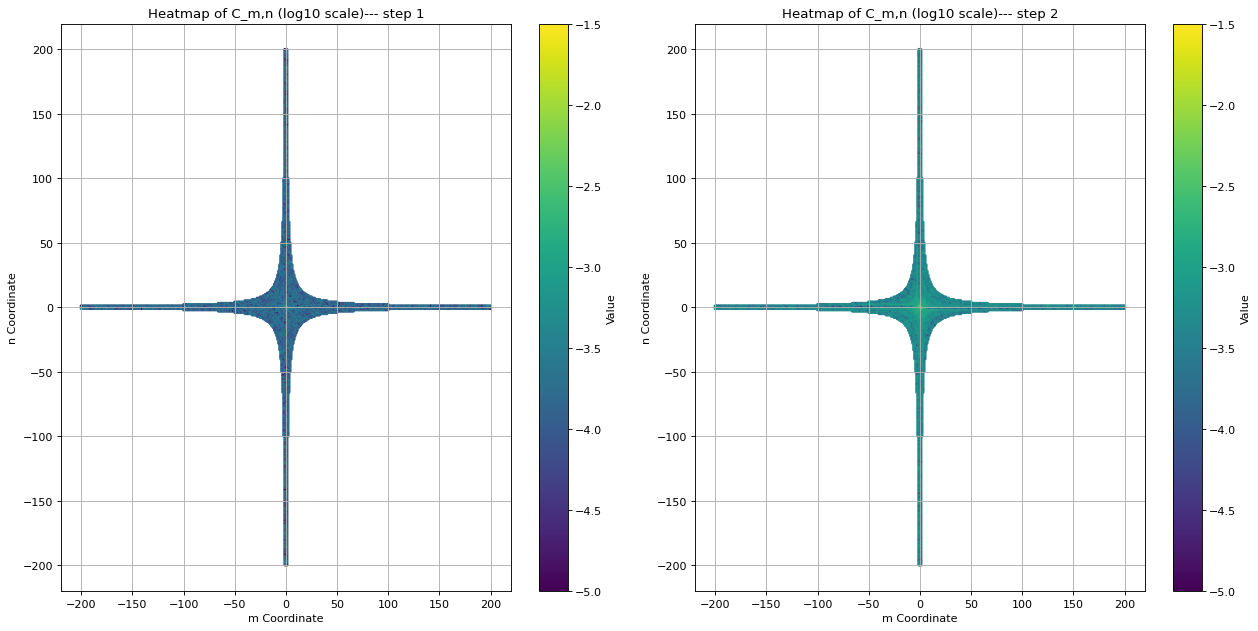

In [10]:
import matplotlib.pyplot as plt

# 创建一个图形
plt.figure(figsize=(16, 8), dpi=80)

# 设置第一个子图为当前活动的子图，并调用第一个show_coeff方法
plt.subplot(1, 2, 1)
model.HPBC_steps[0].show_coeff(title='step 1')

# 设置第二个子图为当前活动的子图，并调用第二个show_coeff方法
plt.subplot(1, 2, 2)
model.HPBC_steps[1].show_coeff(title = 'step 2')

# 调整子图布局
plt.tight_layout()
plt.show()


# data

In [11]:
import pickle

path = 'data/test_data_few.pkl'
data, info = pickle.load(open(path, 'rb'))

/home/xiaoxinyu/.conda/envs/fiber/lib/python3.9/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(


In [5]:
import src.JaxSimulation.DataLoader as DL 

In [16]:
path = '../data/batch2_bits4e5_SF1.2_mode1/Tx_Nch1_20GHz_Pch5dBm'

pickle.load(open(path, 'rb'))

{'key': Array([3713722964,  924499373], dtype=uint32),
 'batch': 2,
 'M': 16,
 'Nbits': 400000,
 'sps': 2,
 'Nch': 1,
 'Nmodes': 1,
 'Rs': 20000000000.0,
 'freqspace': 24000000000.0,
 'Pch_dBm': 5,
 'Ai': 1,
 'Vpi': 2,
 'Vb': -2,
 'Ntaps': 4096,
 'roll': 0.1,
 'pulse_type': 'rc',
 'shape_info': 'sigWDM:[batch, Nsymb*SpS, Nch, Nmodes],  SymbTx:[batch, Nsymb, Nch, Nmodes]',
 'pulse': array([ 2.05672623e-22,  2.41305054e-09, -2.92975428e-24, ...,
        -3.76945243e-09, -2.92975428e-24,  2.41305054e-09]),
 'Fc': 193414489032258.06}

In [17]:
path = '../data/Final_batch2_bits4e5_SF1.2_mode1/Channel_Nch11_10GHz_Pch-1dBm'

pickle.load(open(path, 'rb'))

{'signal': array([[[-0.02308668-0.07181533j],
         [-0.02628406+0.06731753j],
         [ 0.04910401+0.03206743j],
         ...,
         [ 0.00897965+0.04496462j],
         [ 0.07182696+0.03533806j],
         [ 0.05409571-0.03909717j]],
 
        [[ 0.0431249 +0.00074081j],
         [-0.05190444-0.06537913j],
         [-0.04629132-0.14993552j],
         ...,
         [ 0.00681509+0.05046826j],
         [ 0.00666648-0.01068705j],
         [ 0.03016109+0.09070062j]]]),
 'config': {'key': Array([2179835987,  895488617], dtype=uint32),
  'Ltotal': 2000,
  'Lspan': 80,
  'hz': 0.5,
  'alpha': 0.2,
  'D': 16.5,
  'gamma': 1.6567,
  'Fc': 193414489032258.06,
  'amp': 'edfa',
  'NF': 4.5,
  'order': 2,
  'openPMD': False,
  'Dpmd': 3,
  'Lcorr': 0.1,
  'unit info': 'Ltotal:[km]  Lspan:[km]  hz:[km]  alpha:[dB/km]  D:[ps/nm/km]  Fc:[Hz]  gamma:[1/W/km]  Dpmd:[s/sqrt(km)]  Lcorr:[km] NF:[dB]'}}

In [62]:
s = "_outputs/log_tensorboard/SymFoPBC_L100_rho1_index_typeA_Nch1_Rs40_opt(Adam_lr1e-5)_loss(Mean)_Pch-1"

s[0:20]

'_outputs/log_tensorb'

In [103]:
with open('configs/Rs40_Nch1/fopbc_trainpower/L200_lossMSE_Pch-3.yaml', 'r') as file:
    lines = file.readlines()
lines

['# config.yaml\n',
 'train_path: "data/train_data_afterCDCDSP.pkl"\n',
 'test_path: "data/test_data_afterCDCDSP.pkl"\n',
 'Rs: 40   # train symbol rate\n',
 'Nch: 1   # train Nch\n',
 'Pch: [-3] # train Pch\n',
 '\n',
 '# model setting\n',
 'model_name: "SymFoPBC"\n',
 'model info:\n',
 '  L: 200\n',
 '  rho: 1\n',
 '  index_type: "A"\n',
 '\n',
 '\n',
 '# training details\n',
 'epochs: 200\n',
 'save_interval: 10\n',
 'iters_per_batch: 1\n',
 'batchs: 23                  # number of batch\n',
 'tbpl: 4000                  # batch size\n',
 'train_discard: 2000\n',
 'ber_discard: 10000\n',
 'loss_type: "MSE"\n',
 'opt: "Adam"\n',
 'opt info:\n',
 '  lr: 0.00001 \n',
 'weight_decay: 0\n',
 'lamb: 0\n',
 'device: "cuda:0"\n',
 '\n',
 'tensorboard_path: "_outputs/log_tensorboard/SymFoPBC_L200_rho1_index_typeA_Nch1_Rs40_opt(Adam_lr1e-5)_loss(MSE)_Pch-3"\n',
 'model_path: "_models/SymFoPBC_L200_rho1_index_typeA_Nch1_Rs40_opt(Adam_lr1e-5)_loss(MSE)_Pch-3"\n']

In [154]:
def g(s):
    x = s.split('/')
    rs = 'Rs'
    y = x[1].split('_')
    
    for t in y:
        if 'Rs' in t:
            rs = t
    
    y1 = [t for t in y if 'Rs' not in t and 'Nch' not in t]
    y1 = '_'.join(y1[1:])
    ind = rs + '_Nch1'
    x.insert(1, ind)
    x.insert(2, y[0])
    x[-1] = y1
    return '/'.join(x)

def f(s):
    x = s.split('/')
    rs = 'Rs'
    y = x[2].split('_')
    
    for t in y:
        if 'Rs' in t:
            rs = t
        
    y1 = [t for t in y if 'Rs' not in t and 'Nch' not in t]
    y1 = '_'.join(y1[1:])
    ind = rs + '_Nch1'
    x.insert(2, ind)
    x.insert(3, y[0])
    x[-1] = y1
    return '/'.join(x)

In [156]:
f(lines[-2])

'tensorboard_path: "_outputs/log_tensorboard/Rs40_Nch1/SymFoPBC/L200_rho1_index_typeA_opt(Adam_lr1e-5)_loss(MSE)_Pch-3"\n'

In [152]:
x = lines[-1].split('/')
y = x[1].split('_')

In [153]:
for t in y:
    if 'Nch' in t:
        y.remove(t)
    if 'Rs' in t:
        rs = t
        y.remove(t)

for t in y:
    if 'Nch' in t:
        y.remove(t)
    if 'Rs' in t:
        rs = t
        y.remove(t)

y

['SymFoPBC',
 'L200',
 'rho1',
 'index',
 'typeA',
 'opt(Adam',
 'lr1e-5)',
 'loss(MSE)',
 'Pch-3"\n']

In [161]:
def g(s):
    x = s.split('/')
    rs = 'Rs'
    y = x[1].split('_')
    
    for t in y:
        if 'Rs' in t:
            rs = t
    
    y1 = [t for t in y if 'Rs' not in t and 'Nch' not in t]
    y1 = '_'.join(y1[1:])
    ind = rs + '_Nch1'
    x.insert(1, ind)
    x.insert(2, y[0])
    x[-1] = y1
    return '/'.join(x)

def f(s):
    x = s.split('/')
    rs = 'Rs'
    y = x[2].split('_')
    
    for t in y:
        if 'Rs' in t:
            rs = t
        
    y1 = [t for t in y if 'Rs' not in t and 'Nch' not in t]
    y1 = '_'.join(y1[1:])
    ind = rs + '_Nch1'
    x.insert(2, ind)
    x.insert(3, y[0])
    x[-1] = y1
    return '/'.join(x)

def process_line(line):
    if line.startswith('tensorboard_path:'):
        return f(line)
    elif line.startswith('model_path:'):
        return g(line)
    else:
        # 不做更改
        return line

def process_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    with open(file_path, 'w') as file:
        for line in lines:
            file.write(process_line(line))

# 文件路径
file_path = 'test.yaml'
process_file(file_path)


In [167]:
import os

def p(file_path):
    # 这里是你的文件处理逻辑
    # 例如，仅打印文件路径
    print(f"Processing file: {file_path}")

def apply_function_to_files(directory, function):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            print(file_path)
            function(file_path)

# 指定的目录路径
directory_path = 'configs/Rs80_Nch1/'

# 将函数应用于目录下的所有文件
apply_function_to_files(directory_path, process_file)


configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn10.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn12.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn3.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn8.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn7.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn5.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn6.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn2.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn4.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn13.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn14.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn9.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn1.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn11.yaml
configs/Rs80_Nch1/pbcnn_Rs80/pbc_nn0.yaml
configs/Rs80_Nch1/fopbc_trainpower/L400_Pch3.yaml
configs/Rs80_Nch1/fopbc_trainpower/L400_Pch4.yaml
configs/Rs80_Nch1/fopbc_trainpower/L400_Pch-3.yaml
configs/Rs80_Nch1/fopbc_trainpower/L400_Pch-4.yaml
configs/Rs80_Nch1/fopbc_trainpower/L400_Pch2.yaml
configs/Rs80_Nch1/fopbc_trainpower/L400_default.yaml
configs/Rs80_Nch1/f

In [1]:
import torch
import torch.nn as nn

class ParentNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ParentNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

class ChildNN(ParentNN):
    def __init__(self, input_size, hidden_size, output_size):
        super(ChildNN, self).__init__(input_size, hidden_size, output_size)
        # 可以在这里添加子类特有的层

    def forward(self, x):
        x = super().forward(x)  # 调用父类的forward方法
        # 添加子类特有的操作
        return x

# 创建一个ChildNN实例
input_size = 10
hidden_size = 20
output_size = 5

child_model = ChildNN(input_size, hidden_size, output_size)

# 使用模型进行前向传播
input_data = torch.randn(1, input_size)
output = child_model(input_data)
print(output)


tensor([[ 0.1739, -0.0599,  0.0341,  0.1369, -0.2333]],
       grad_fn=<AddmmBackward0>)
